### ***도착시간 로그 데이터 하나로 합치기***

In [1]:
from glob import glob

from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
glob("../구미버스_이벤트_로그/gm_busevent*/gm_busevent.csv")

[]

In [3]:
res = []
for path in glob("구미버스_이벤트_로그/gm_busevent*/gm_busevent.csv"):
   df = pd.read_csv(path)
   res.append(df)

In [4]:
print(res[:2])

[      BRT_ID BRT_DIRECTION  BRT_CLASS   BRN_IN_OCCURYMDHMS  \
0        140            순환          0  2021-11-10 01:59:15   
1      380-1           정방향          0  2021-11-10 03:11:07   
2        885           정방향          0  2021-11-10 06:06:23   
3       95-1           정방향          1  2021-11-10 06:06:25   
4        172           역방향          0  2021-11-10 06:06:36   
...      ...           ...        ...                  ...   
17869     26           정방향          0  2021-11-10 09:44:48   
17870  380-1           정방향          0  2021-11-10 11:43:30   
17871    181           정방향          0  2021-11-10 17:38:30   
17872  380-1           정방향          0  2021-11-10 17:52:18   
17873    140            순환          0  2021-11-10 19:06:21   

       BRN_OUT_OCCURYMDHMS      BNODE_KNAME     BNODE_X    BNODE_Y  
0      2021-11-10 01:59:26        푸르지오캐슬B단지  128.336100  36.124709  
1      2021-11-10 03:11:16            각산네거리  128.434978  36.154153  
2      2021-11-10 06:07:03           금오산사거리  12

In [5]:
df = pd.concat(res,ignore_index=True)

In [6]:
df.shape

(1225348, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225348 entries, 0 to 1225347
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   BRT_ID               1225348 non-null  object 
 1   BRT_DIRECTION        1225348 non-null  object 
 2   BRT_CLASS            1225348 non-null  int64  
 3   BRN_IN_OCCURYMDHMS   1225348 non-null  object 
 4   BRN_OUT_OCCURYMDHMS  1225348 non-null  object 
 5   BNODE_KNAME          1213843 non-null  object 
 6   BNODE_X              1225348 non-null  float64
 7   BNODE_Y              1225348 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 74.8+ MB


In [8]:
df.isna().sum()

BRT_ID                     0
BRT_DIRECTION              0
BRT_CLASS                  0
BRN_IN_OCCURYMDHMS         0
BRN_OUT_OCCURYMDHMS        0
BNODE_KNAME            11505
BNODE_X                    0
BNODE_Y                    0
dtype: int64

In [9]:
# min max로 조회한 기간(10월 2일 - 11월 10일) 데이터가 들어왔는지 확인
display(
   df.BRN_IN_OCCURYMDHMS.max(),
   df.BRN_IN_OCCURYMDHMS.min())

'2021-11-10 19:06:21'

'2021-10-02 05:35:47'

In [10]:
# column name change to korean
df = df.rename(columns={"BRT_ID": "버스노선_이름", "BRT_DIRECTION": "버스노선_방향", "BRT_CLASS": "버스노선_경유코드"
                   , "BRN_IN_OCCURYMDHMS": "도착시간", "BRN_OUT_OCCURYMDHMS": "출발시간", "BNODE_KNAME": "정류장_이름"
                   , "BNODE_X": "경도", "BNODE_Y": "위도"}) 

In [11]:
df.head(2)

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,경도,위도
0,140,순환,0,2021-11-10 01:59:15,2021-11-10 01:59:26,푸르지오캐슬B단지,128.336100,36.124709
1,380-1,정방향,0,2021-11-10 03:11:07,2021-11-10 03:11:16,각산네거리,128.434978,36.154153


In [12]:
# null 확인
df.isna().sum()

버스노선_이름          0
버스노선_방향          0
버스노선_경유코드        0
도착시간             0
출발시간             0
정류장_이름       11505
경도               0
위도               0
dtype: int64

In [13]:
df[df.정류장_이름.isna()].head()

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,경도,위도
257,5000,역방향,0,2021-11-10 06:16:15,2021-11-10 06:16:15,NaN,128.434978,36.154153
265,5000,역방향,0,2021-11-10 06:16:28,2021-11-10 06:16:35,NaN,128.434978,36.154153
270,5000,역방향,0,2021-11-10 06:16:41,2021-11-10 06:16:46,NaN,128.434978,36.154153
423,411-6,순환,5,2021-11-10 06:20:21,2021-11-10 06:20:32,NaN,128.434978,36.154153
608,74,정방향,0,2021-11-10 06:24:29,2021-11-10 06:24:40,NaN,128.434978,36.154153


In [14]:
df[(df.정류장_이름.isna()) & (df.버스노선_이름 == '5000')][['경도','위도']].value_counts()

경도          위도       
128.434978  36.154153    1493
Name: count, dtype: int64

In [15]:
df = df.dropna(axis=0)
df.shape

(1213843, 8)

In [ ]:
# 2021_timelog.csv로 내보내기
# df.to_csv("2021_timelog.csv", index=False)

### ***도착시간 데이터 EDA***

In [3]:
# 2021_timelog.csv df로 읽기
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("2021_timelog.csv")
df.head(3)

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,경도,위도
0,140,순환,0,2021-11-10 01:59:15,2021-11-10 01:59:26,푸르지오캐슬B단지,128.336100,36.124709
1,380-1,정방향,0,2021-11-10 03:11:07,2021-11-10 03:11:16,각산네거리,128.434978,36.154153
2,885,정방향,0,2021-11-10 06:06:23,2021-11-10 06:07:03,금오산사거리,128.335880,36.126888


In [4]:
# 910번 데이터 확인 -> O
df[df.버스노선_이름 == '910']

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,경도,위도
3826,910,정방향,0,2021-11-10 07:08:04,2021-11-10 07:10:18,구미역,128.329321,36.129635
4112,910,정방향,0,2021-11-10 07:10:46,2021-11-10 07:11:13,농협,128.333200,36.128023
4203,910,정방향,0,2021-11-10 07:11:45,2021-11-10 07:13:43,금오산사거리,128.335880,36.126888
4412,910,정방향,0,2021-11-10 07:13:57,2021-11-10 07:14:04,원평동 행정복지센터 건너,128.337874,36.126044
4428,910,정방향,0,2021-11-10 07:14:09,2021-11-10 07:14:19,금오시장 건너,128.339623,36.125278
...,...,...,...,...,...,...,...,...
1203046,910,역방향,0,2021-10-17 08:26:45,2021-10-17 08:26:53,송원고가밑(구미역방면),128.343969,36.123412
1203076,910,역방향,0,2021-10-17 08:27:13,2021-10-17 08:27:19,금오시장 입구,128.340973,36.124741
1203093,910,역방향,0,2021-10-17 08:27:26,2021-10-17 08:27:49,원평동 행정복지 센터 앞,128.338893,36.125819
1203134,910,역방향,0,2021-10-17 08:28:04,2021-10-17 08:28:28,대구은행앞,128.335663,36.127183


In [5]:
# 버스노선_경유코드: 경유노선 구분 의미 파악
df.버스노선_경유코드.value_counts()

버스노선_경유코드
0    1005225
1      78747
2      61597
3      28861
4      20744
5       8689
6       6356
7       1783
9       1492
8        349
Name: count, dtype: int64

In [6]:
# 같은 버스인데도 경유코드가 다른 경우가 있음. 의미는 잘..
df[df.버스노선_경유코드 == 5].버스노선_이름.value_counts()

버스노선_이름
340-4    3179
11       1825
410-1    1384
411-6    1190
360-3    1111
Name: count, dtype: int64

In [7]:
# 버스노선 방향은 정방향과 역방향, 순환이 있음
df.버스노선_방향.value_counts()

버스노선_방향
정방향    478013
역방향    460350
순환     275480
Name: count, dtype: int64

In [8]:
# 도착시간과 출발시간을 날짜 data로 변환 -> 데이터 효율 올리고 날짜 함수(dt.month)를 사용하기 위해
df.도착시간 = pd.to_datetime(df.도착시간)
df.출발시간 = pd.to_datetime(df.출발시간)

### ***910번 구간_걸린시간 구하기***

In [9]:
# 정방향, 역방향, 순환의 의미
# 910번의 정방향: 구미역 -> 옥계
df[(df.버스노선_이름 == '910') & (df.버스노선_방향 == '정방향')]

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,경도,위도
3826,910,정방향,0,2021-11-10 07:08:04,2021-11-10 07:10:18,구미역,128.329321,36.129635
4112,910,정방향,0,2021-11-10 07:10:46,2021-11-10 07:11:13,농협,128.333200,36.128023
4203,910,정방향,0,2021-11-10 07:11:45,2021-11-10 07:13:43,금오산사거리,128.335880,36.126888
4412,910,정방향,0,2021-11-10 07:13:57,2021-11-10 07:14:04,원평동 행정복지센터 건너,128.337874,36.126044
4428,910,정방향,0,2021-11-10 07:14:09,2021-11-10 07:14:19,금오시장 건너,128.339623,36.125278
...,...,...,...,...,...,...,...,...
1198824,910,정방향,0,2021-10-17 07:36:03,2021-10-17 07:37:22,골드클래스앞,128.428267,36.157383
1199011,910,정방향,0,2021-10-17 07:38:04,2021-10-17 07:38:17,우미린센트럴파크 후문,128.431160,36.161066
1199070,910,정방향,0,2021-10-17 07:38:47,2021-10-17 07:38:56,우미린풀하우스건너,128.436179,36.161001
1199104,910,정방향,0,2021-10-17 07:39:11,2021-10-17 07:39:26,인덕중학교건너,128.438741,36.161121


In [10]:
# 910번의 역방향: 옥계 -> 구미역
df[(df.버스노선_이름 == '910') & (df.버스노선_방향 == '역방향')]

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,경도,위도
8462,910,역방향,0,2021-11-10 07:57:14,2021-11-10 07:57:31,인덕중흥S클래스앞,128.442235,36.164035
8596,910,역방향,0,2021-11-10 07:58:50,2021-11-10 07:59:10,중흥S클래스에코시티,128.438975,36.161346
8719,910,역방향,0,2021-11-10 08:00:23,2021-11-10 08:00:53,우미린풀하우스정문,128.436067,36.161346
8807,910,역방향,0,2021-11-10 08:01:16,2021-11-10 08:01:28,우미린센트럴파크 후문건너,128.432100,36.161337
9020,910,역방향,0,2021-11-10 08:03:41,2021-11-10 08:04:04,골드클래스건너,128.428001,36.157399
...,...,...,...,...,...,...,...,...
1203046,910,역방향,0,2021-10-17 08:26:45,2021-10-17 08:26:53,송원고가밑(구미역방면),128.343969,36.123412
1203076,910,역방향,0,2021-10-17 08:27:13,2021-10-17 08:27:19,금오시장 입구,128.340973,36.124741
1203093,910,역방향,0,2021-10-17 08:27:26,2021-10-17 08:27:49,원평동 행정복지 센터 앞,128.338893,36.125819
1203134,910,역방향,0,2021-10-17 08:28:04,2021-10-17 08:28:28,대구은행앞,128.335663,36.127183


In [11]:
# 910번 버스 다른 날짜 데이터 확인
display(df[df.버스노선_이름 == '910']['도착시간'].min()
,df[df.버스노선_이름 == '910']['도착시간'].max())


Timestamp('2021-10-12 09:54:04')

Timestamp('2021-11-10 09:40:22')

In [12]:
# 910번 버스의 구간_이름과 구간_걸린시간 구하기
bus910 = df[(df.버스노선_이름 == '910')].sort_values(['도착시간', '버스노선_이름', '버스노선_방향'], ascending=(1,1,1)).reset_index(drop=True)
bus910['구간_이름'] = bus910.정류장_이름 + " - " + bus910.정류장_이름.shift(-1)
bus910['구간_걸린시간'] = bus910.도착시간.shift(-1) - bus910.도착시간

In [13]:
# bus910 확인
bus910.head()

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,경도,위도,구간_이름,구간_걸린시간
0,910,정방향,0,2021-10-12 09:54:04,2021-10-12 09:54:30,양호동빈수골(금오공대입구방면),128.391727,36.129077,양호동빈수골(금오공대입구방면) - 옥계중학교건너,0 days 00:02:33
1,910,정방향,0,2021-10-12 09:56:37,2021-10-12 09:56:46,옥계중학교건너,128.411420,36.136406,옥계중학교건너 - 옥계대우아파트건너,0 days 00:00:28
2,910,정방향,0,2021-10-12 09:57:05,2021-10-12 09:57:31,옥계대우아파트건너,128.415010,36.136929,옥계대우아파트건너 - 4공단입구(옥계방면),0 days 00:01:50
3,910,정방향,0,2021-10-12 09:58:55,2021-10-12 09:59:55,4공단입구(옥계방면),128.417766,36.137739,4공단입구(옥계방면) - 옥계부영아파트건너,0 days 00:01:21
4,910,정방향,0,2021-10-12 10:00:16,2021-10-12 10:00:46,옥계부영아파트건너,128.418102,36.140893,옥계부영아파트건너 - 옥계성당,0 days 00:01:44


float64
구간_걸린시간
2800.383333     1
2276.450000     1
1532.166667     1
1415.633333     1
1394.816667     1
               ..
1.083333       36
1.066667       25
1.050000       20
1.033333       25
1.016667       21
Name: count, Length: 392, dtype: int64



<Axes: xlabel='구간_걸린시간', ylabel='Count'>

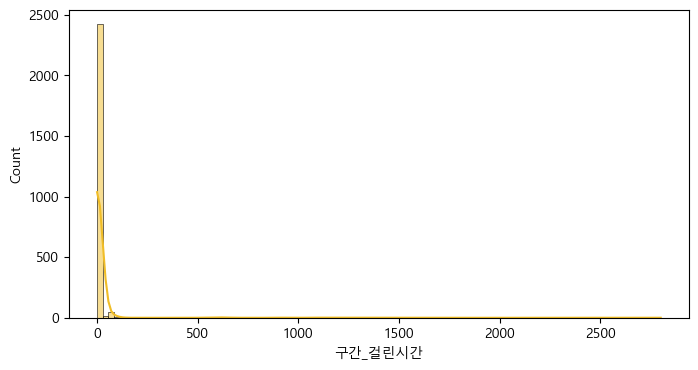

In [14]:
import seaborn as sns

# 한글 폰트 적용
import matplotlib.font_manager as fm
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 구간_걸린시간 값 확인
total_second = bus910.구간_걸린시간.dt.total_seconds() / 60
print(total_second.dtype)
filtered_s = total_second[(total_second > 1)]
print(filtered_s.value_counts().sort_index(ascending=0))
print(f"")
# 사용자 정의 색상 팔레트 (그라데이션 적용)
color = "#F0BD27"

# 시각화
plt.figure(figsize=(8, 4))
sns.histplot(filtered_s, kde=True, bins=100, color=color)


In [15]:
# 값 확인
bus910['걸린시간_분'] = bus910.구간_걸린시간.dt.total_seconds() / 60
bus910[bus910.걸린시간_분 > 5].sort_values('걸린시간_분', ascending=0).tail(5)

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,경도,위도,구간_이름,구간_걸린시간,걸린시간_분
1622,910,정방향,0,2021-10-23 15:08:58,2021-10-23 15:09:16,인덕중흥S클래스건너,128.442420,36.163866,인덕중흥S클래스건너 - 인덕중흥S클래스앞,0 days 00:05:07,5.116667
4057,910,정방향,0,2021-11-05 07:22:28,2021-11-05 07:22:44,공단본부건너,128.376794,36.110770,공단본부건너 - 세무서네거리,0 days 00:05:03,5.050000
1013,910,정방향,0,2021-10-20 15:09:58,2021-10-20 15:10:14,인덕중학교건너,128.438741,36.161121,인덕중학교건너 - 인덕중흥S클래스앞,0 days 00:05:03,5.050000
3416,910,정방향,0,2021-11-01 07:58:06,2021-11-01 07:58:23,우미린풀하우스건너,128.436179,36.161001,우미린풀하우스건너 - 우미린풀하우스정문,0 days 00:05:02,5.033333
1134,910,정방향,0,2021-10-22 07:25:36,2021-10-22 07:25:49,공단본부건너,128.376794,36.110770,공단본부건너 - 세무서네거리,0 days 00:05:01,5.016667


In [16]:
bus910.iloc[3998:4002]

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,경도,위도,구간_이름,구간_걸린시간,걸린시간_분
3998,910,정방향,0,2021-11-02 20:09:28,2021-11-02 20:09:36,옥계부영아파트건너,128.418102,36.140893,옥계부영아파트건너 - 옥계성당,0 days 00:01:13,1.216667
3999,910,정방향,0,2021-11-02 20:10:41,2021-11-02 20:10:49,옥계성당,128.422300,36.145703,옥계성당 - 골드클래스앞,1 days 13:56:27,2276.450000
4000,910,정방향,0,2021-11-04 10:07:08,2021-11-04 10:07:12,골드클래스앞,128.428267,36.157383,골드클래스앞 - 쌍용예가더파크아파트건너,0 days 00:00:20,0.333333
4001,910,정방향,0,2021-11-04 10:07:28,2021-11-04 10:07:37,쌍용예가더파크아파트건너,128.428493,36.159739,쌍용예가더파크아파트건너 - 우미린센트럴파크 후문,0 days 00:00:33,0.550000


In [17]:
# 구간 데이터 불러오기: 구간과 구간_걸린시간 데이터를 합치기
bus910_route = pd.read_excel("910번_버스_구간거리.xlsx", sheet_name='Sheet1'
              , engine= 'openpyxl')
bus910_route.head(3)

,구간_이름,구간_고유번호,구간_거리(m)
0,구미역 - 농협,10080 - 10167,445
1,농협 - 금오산사거리,10167 - 10134,230
2,금오산사거리 - 원평동 행정복지센터 건너,10134 - 10901,225


In [18]:
# 910번 구간과 걸린시간을 매핑
bus910_route_time = pd.merge(bus910_route, bus910, on= '구간_이름', how= 'left')

# 걸린시간이 na값인 구간의 이름을 출력
print(f"걸린시간이 없는 구간 리스트:\n {bus910_route_time[bus910_route_time.구간_걸린시간.isna()].구간_이름.values}")
print(f"걸린시간 값이 없는 구간의 수:\n {len(bus910_route_time[bus910_route_time.구간_걸린시간.isna()])}")

걸린시간이 없는 구간 리스트:
 ['오성예식장앞 - 구미IC네거리(구미경찰서방면)' '구미IC네거리(구미경찰서방면) - 구미경찰서건너'
 '우미린센트럴파크 후문 - 산동농협경제사업소앞' '산동농협경제사업소앞 - 산동보건지소앞' '산동보건지소앞 - 인덕리(확장단지방면)'
 '인덕리(확장단지방면) - 인덕중흥S클래스앞' '구미경찰서 - 구미IC네거리(구미종합터미널건너방면)'
 '구미IC네거리(구미종합터미널건너방면) - 구미종합터미널건너']
걸린시간 값이 없는 구간의 수:
 8


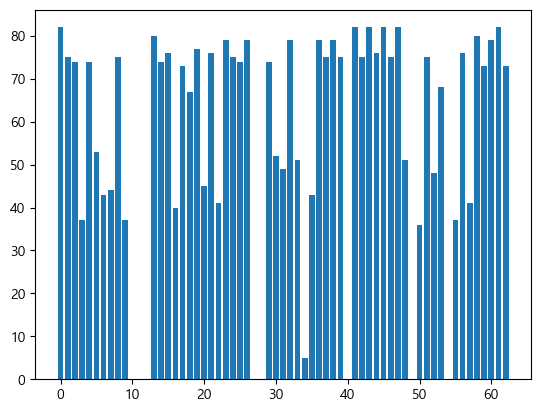

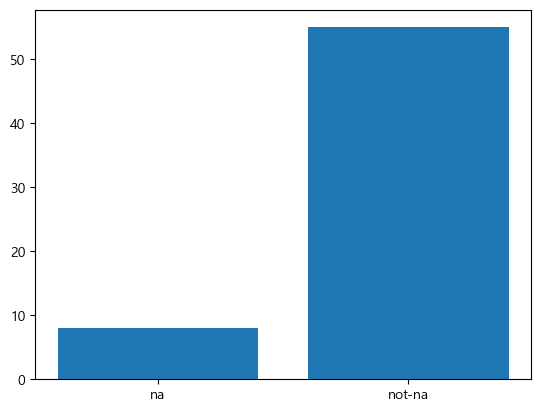

In [19]:
# 구간별 걸린시간의 수 구하기
time_count = bus910_route_time.groupby("구간_이름")["구간_걸린시간"].count()
plt.bar(range(len(time_count)), time_count.values)
plt.show()

# 걸린시간이 없는 구간, 있는 구간의 수를 막대 그래프로 그리기
plt.bar(['na', 'not-na'], [(time_count == 0).sum(), (time_count != 0).sum()])
plt.show()


### ***버스번호 변경 확인***

In [20]:
# 필요한 데이터만 고르기
target_columns = ['버스노선_이름', '버스노선_방향', '버스노선_경유코드', '도착시간', '출발시간', '정류장_이름']
df = df[target_columns]
df.head(3)

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름
0,140,순환,0,2021-11-10 01:59:15,2021-11-10 01:59:26,푸르지오캐슬B단지
1,380-1,정방향,0,2021-11-10 03:11:07,2021-11-10 03:11:16,각산네거리
2,885,정방향,0,2021-11-10 06:06:23,2021-11-10 06:07:03,금오산사거리


In [21]:
# 버스노선_이름, 버스노선_방향 같으면 같은 버스? 
# 노선ID (버스 구별자) 만들기

len(df.groupby(['버스노선_이름', '버스노선_방향']))

305

In [22]:
df['이름_방향'] = df.버스노선_이름 + '_' + df.버스노선_방향
df.head(3)

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,이름_방향
0,140,순환,0,2021-11-10 01:59:15,2021-11-10 01:59:26,푸르지오캐슬B단지,140_순환
1,380-1,정방향,0,2021-11-10 03:11:07,2021-11-10 03:11:16,각산네거리,380-1_정방향
2,885,정방향,0,2021-11-10 06:06:23,2021-11-10 06:07:03,금오산사거리,885_정방향


In [23]:
# 고유한 노선 수: 305개
df.이름_방향.nunique()

305

In [24]:
# 노선ID로 바꿀 버스번호_방향들
df.이름_방향.values

array(['140_순환', '380-1_정방향', '885_정방향', ..., '554_정방향', '554_정방향',
       '554_정방향'], dtype=object)

In [25]:
# 현재 없는 버스번호?
# 버스번호 고유값 확인
df.버스노선_이름.unique()

array(['140', '380-1', '885', '95-1', '172', '12', '890', '92', '74',
       '55', '740', '195', '181', '11', '340', '180', '140-2', '190-3',
       '411-6', '171-4', '24', '26-2', '360', '410-7', '340-4', '185',
       '881', '110', '5000', '10', '171', '140-3', '187-1', '380', '90',
       '73-3', '187', '29', '891', '175', '74-2', '340-5', '410-3', '57',
       '162-1', '72-3', '192', '340-3', '53', '140-6', '20', '910-1',
       '885-1', '11-1', '93', '120', '411-4', '170', '140-1', '182-2',
       '94', '51', '193', '884-2', '411-5', '196', '21', '884', '78',
       '111', '553', '161', '52', '555-1', '404', '24-1', '260', '174-1',
       '72-6', '160', '20-1', '22', '185-2', '78-3', '730', '97', '27',
       '26', '184', '11-5', '360-2', '28-1', '80', '71', '83', '11-3',
       '5200', '182-1', '883', '70-3', '460', '162', '360-3', '380-2',
       '70-2', '188', '380-3', '340-1', '11-4', '910', '91', '95-2',
       '361', '183', '26-1', '303', '20-3', '60', '360-1', '170-2', '410

In [26]:
# 현재 구미시 버스번호 가져오기
route_list = pd.read_csv('구미버스_노선번호.csv')
route_list.head(3)

,종점,막차시간,노선ID,노선번호,노선유형,기점,첫차시간
0,구미역(중앙시장),2146,GMB19120,191,일반버스,옥계이편한세상APT앞,908
1,해평버스정류장,2150,GMB19210,192,좌석버스,구미역,835
2,구미역(중앙시장),2253,GMB19220,192,좌석버스,해평버스정류장,625


In [27]:
# 버스번호 업데이트 확인: 10개의 버스번호가 변경됨

past_bus = set(df.버스노선_이름.unique())
print(len(past_bus))
now_bus = set(route_list.노선번호.unique())
changed_bus = past_bus - now_bus
print(len(changed_bus))

207
10


### ***다른 노선도 910번처럼 노선과 걸린시간 구하기***

In [28]:
# df 컬럼명 확인
display(df.head(3), df.shape)

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,이름_방향
0,140,순환,0,2021-11-10 01:59:15,2021-11-10 01:59:26,푸르지오캐슬B단지,140_순환
1,380-1,정방향,0,2021-11-10 03:11:07,2021-11-10 03:11:16,각산네거리,380-1_정방향
2,885,정방향,0,2021-11-10 06:06:23,2021-11-10 06:07:03,금오산사거리,885_정방향


(1213843, 7)

In [29]:
# 고유 버스 조회
unique_route = df.이름_방향.unique()
unique_route[:5]

array(['140_순환', '380-1_정방향', '885_정방향', '95-1_정방향', '172_역방향'],
      dtype=object)

In [30]:
# 이름_방향으로 데이터프레임 구분
res=[]
for route in unique_route:
   route_log = df[df.이름_방향 == route].sort_values('도착시간')
   route_log['구간_이름'] = route_log.정류장_이름 + " - " + route_log.정류장_이름.shift(-1)
   route_log['구간_걸린시간'] = route_log.도착시간.shift(-1) - route_log.도착시간
   res.append(route_log)
df_route = pd.concat(res, ignore_index=True)

In [31]:
# df_route 확인
df_route.head()

,버스노선_이름,버스노선_방향,버스노선_경유코드,도착시간,출발시간,정류장_이름,이름_방향,구간_이름,구간_걸린시간
0,140,순환,0,2021-10-11 06:06:01,2021-10-11 06:06:15,농협,140_순환,농협 - 금오산사거리,0 days 00:00:29
1,140,순환,0,2021-10-11 06:06:30,2021-10-11 06:06:55,금오산사거리,140_순환,금오산사거리 - 푸르지오캐슬B단지,0 days 00:02:28
2,140,순환,0,2021-10-11 06:08:58,2021-10-11 06:09:17,푸르지오캐슬B단지,140_순환,푸르지오캐슬B단지 - 가톨릭근로자문화센타,0 days 00:00:26
3,140,순환,0,2021-10-11 06:09:24,2021-10-11 06:09:37,가톨릭근로자문화센타,140_순환,가톨릭근로자문화센타 - 송정동번개시장건너,0 days 00:01:51
4,140,순환,0,2021-10-11 06:11:15,2021-10-11 06:11:29,송정동번개시장건너,140_순환,송정동번개시장건너 - 시청후문앞,0 days 00:00:46


In [32]:
# 필요한 컬럼만 사용
target_columns = ['구간_이름', '구간_걸린시간']
df_route = df_route[target_columns]
df_route.shape

(1213843, 2)

### ***구미 노선별 구간과 매핑***

In [33]:
# 구미 모든 구간 가져오기
all_route = pd.read_csv("구미버스_노선별_구간.csv")
all_route.head(3)


,노선번호,정류소순서,구간_이름
0,GMB19120,1,옥계이편한세상APT앞 - 우미린더스카이앞
1,GMB19120,2,우미린더스카이앞 - 4공단(현진아파트방면)
2,GMB19120,3,4공단(현진아파트방면) - 현진아파트앞


In [34]:
# 모든 구간 df 정보 확인
display(all_route.shape, all_route.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14066 entries, 0 to 14065
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   노선번호    14066 non-null  object
 1   정류소순서   14066 non-null  int64 
 2   구간_이름   14066 non-null  object
dtypes: int64(1), object(2)
memory usage: 329.8+ KB


(14066, 3)

None

In [35]:
# 매핑하기
route = pd.merge(all_route, df_route, on= '구간_이름', how = 'left')
display(route.shape, route.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114142 entries, 0 to 15114141
Data columns (total 4 columns):
 #   Column   Dtype          
---  ------   -----          
 0   노선번호     object         
 1   정류소순서    int64          
 2   구간_이름    object         
 3   구간_걸린시간  timedelta64[ns]
dtypes: int64(1), object(2), timedelta64[ns](1)
memory usage: 461.2+ MB


(15114142, 4)

None

In [66]:
# data 확인
route.head()

,노선번호,정류소순서,구간_이름,구간_걸린시간
0,GMB19120,1,옥계이편한세상APT앞 - 우미린더스카이앞,0 days 00:01:17
1,GMB19120,1,옥계이편한세상APT앞 - 우미린더스카이앞,0 days 00:02:21
2,GMB19120,1,옥계이편한세상APT앞 - 우미린더스카이앞,0 days 00:01:13
3,GMB19120,1,옥계이편한세상APT앞 - 우미린더스카이앞,0 days 00:02:25
4,GMB19120,1,옥계이편한세상APT앞 - 우미린더스카이앞,0 days 00:01:59


In [ ]:
# null값 확인 -> 1630개 구간에서 null값 확인
route.isna().sum()

노선번호          0
정류소순서         0
구간_이름         0
구간_걸린시간    1630
dtype: int64

In [37]:
# null값 확인
route[route.구간_걸린시간.isna()].head()

,노선번호,정류소순서,구간_이름,구간_걸린시간
82150,GMB19210,8,오성예식장앞 - 구미IC네거리(구미경찰서방면),NaT
82151,GMB19210,9,구미IC네거리(구미경찰서방면) - 구미경찰서건너,NaT
113430,GMB19210,32,옥계대백타운입구(4공단방면) - 옥계성당,NaT
115196,GMB19210,38,우미린센트럴파크 후문 - 중흥S클래스에듀포레앞,NaT
115197,GMB19210,39,중흥S클래스에듀포레앞 - 인덕중학교건너,NaT


In [52]:
# 노선번호별로 null값 확인 -> 338개 중 292개 노선이 걸린시간이 없는 구간이 있음
na_cnt = route[route.구간_걸린시간.isna()].groupby('노선번호').size()

(array([ 8., 58., 12., 39.,  0., 23., 48., 24., 33.,  0., 18., 11., 12.,
         3.,  3.]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ,  5.8,  6.6,  7.4,  8.2,  9. ,
         9.8, 10.6, 11.4, 12.2, 13. ]),
 <BarContainer object of 15 artists>)

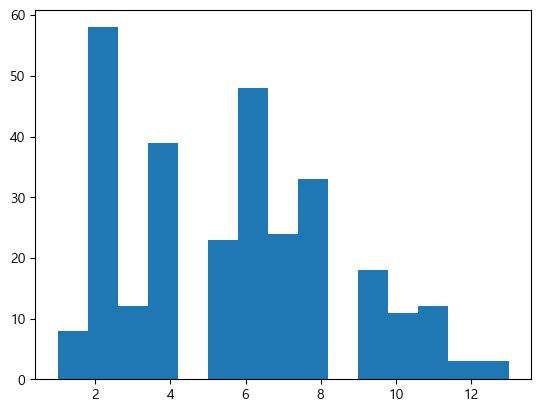

In [53]:
# 노선번호별 정류장 수와 na값 시각화 -> 노선별로 2-8개 정도 구간걸린시간 na값 확인
plt.hist(na_cnt.values, bins=15)

In [54]:
# 모든 노선의 도착시간 필요, 특정 노선 10개만 뽑기
na_cnt[na_cnt>10]

노선번호
GMB140-630    11
GMB2232       13
GMB2330       11
GMB40431      12
GMB410-131    11
GMB410-711    11
GMB51-120     11
GMB51-121     11
GMB5321       13
GMB5510       11
GMB5511       11
GMB5512       11
GMB55310      11
GMB55320      11
GMB72-130     12
GMB7230       13
GMB80-130     11
GMB891-121    12
dtype: int64

In [55]:
na_cnt = pd.DataFrame(na_cnt)
na_cnt = na_cnt.reset_index()
na_cnt = na_cnt.rename(columns={'노선번호': '노선ID', 0: 'na_cnt'})
na_cnt

,노선ID,na_cnt
0,GMB10-130,4
1,GMB10-230,2
2,GMB101-120,1
3,GMB1010,4
4,GMB10130,5
...,...,...
287,GMB95-111,4
288,GMB95-121,2
289,GMB95-220,2
290,GMB96010,6


In [57]:
# na_cnt와 route_list를 merge하기

na_cnt = pd.merge(route_list, na_cnt, on='노선ID', how='inner')
na_cnt.head(3)

,종점,막차시간,노선ID,노선번호,노선유형,기점,첫차시간,na_cnt
0,해평버스정류장,2150,GMB19210,192,좌석버스,구미역,835,7
1,구미역(중앙시장),2253,GMB19220,192,좌석버스,해평버스정류장,625,6
2,장천버스터미널 종점,1853,GMB193-210,193-2,일반버스,구미역,1853,5


In [64]:
# 최다이용노선의 버스번호 조회
display(
   na_cnt[na_cnt.노선번호 == '340']
   ,na_cnt[na_cnt.노선번호 == '24']
   ,na_cnt[na_cnt.노선번호 == '20']
   ,na_cnt[na_cnt.노선번호 == '140']
   ,na_cnt[na_cnt.노선번호 == '380']
   ,na_cnt[na_cnt.노선번호 == '910']
)

,종점,막차시간,노선ID,노선번호,노선유형,기점,첫차시간,na_cnt
48,구미역(중앙시장),2205,GMB34011,340,일반버스,귀빈맨션(구미여고),2205,5
49,구미역(중앙시장),2215,GMB34030,340,일반버스,구미역,612,2


,종점,막차시간,노선ID,노선번호,노선유형,기점,첫차시간,na_cnt
16,문성2지구,2123,GMB2410,24,일반버스,원평동(대구은행앞방면),606,6
17,문성2지구,1541,GMB2413,24,일반버스,구운초등학교앞,746,9
18,문성2지구,2100,GMB2430,24,일반버스,문성2지구,648,8


,종점,막차시간,노선ID,노선번호,노선유형,기점,첫차시간,na_cnt
14,봉곡청마루출발지(종점),2240,GMB2030,20,일반버스,봉곡청마루출발지(종점),630,6


,종점,막차시간,노선ID,노선번호,노선유형,기점,첫차시간,na_cnt
131,구미역(중앙시장),2320,GMB14030,140,일반버스,구미역,615,2


,종점,막차시간,노선ID,노선번호,노선유형,기점,첫차시간,na_cnt
62,황상종점,2200,GMB38010,380,일반버스,구미역,615,2
63,구미역(중앙시장),2300,GMB38020,380,일반버스,황상종점 출발점,620,8


,종점,막차시간,노선ID,노선번호,노선유형,기점,첫차시간,na_cnt
277,구미역(중앙시장),1940,GMB91030,910,좌석버스,구미역,705,7


In [ ]:
# na값이 10개 이상인 노선 -> 요청함
na_cnt[na_cnt.na_cnt > 10].sort_values('na_cnt', ascending=0).head(10)

,종점,막차시간,노선ID,노선번호,노선유형,기점,첫차시간,na_cnt
22,봉곡청마루출발지(종점),1627,GMB2232,22,일반버스,봉곡청마루출발지(종점),643,13
187,김천시외버스터미널 종점,718,GMB5321,53,좌석버스,구미종합터미널건너,718,13
224,선산터미널종점,2020,GMB7230,72,일반버스,선산터미널종점,1330,13
266,구미역(중앙시장),1700,GMB891-121,891-1,좌석버스,경운대학교(구미운전면허센터),955,12
217,선산터미널종점,1900,GMB72-130,72-1,일반버스,선산터미널종점,800,12
65,금오공대종점,2002,GMB40431,404,일반버스,금오공대종점,640,12
23,봉곡청마루출발지(종점),1920,GMB2330,23,일반버스,봉곡청마루출발지(종점),905,11
89,김천시외버스터미널 종점,1923,GMB51-120,51-1,일반버스,금오공대종점,1443,11
73,태왕아너스아파트건너,610,GMB410-711,410-7,일반버스,구미역,610,11
66,문성2지구,2101,GMB410-131,410-1,좌석버스,구미역,2101,11


### ***노선값 제외하고 구간 고유값 확인***

In [69]:
# 모든 노선별 구간 데이터
all_route.head()

,노선번호,정류소순서,구간_이름
0,GMB19120,1,옥계이편한세상APT앞 - 우미린더스카이앞
1,GMB19120,2,우미린더스카이앞 - 4공단(현진아파트방면)
2,GMB19120,3,4공단(현진아파트방면) - 현진아파트앞
3,GMB19120,4,현진아파트앞 - 삼구아파트
4,GMB19120,5,삼구아파트 - 4공단입구건너(인동농협옥계지점)


In [75]:
# 구간의 유니크 값 확인 -> 2034개 
unique_route = all_route.구간_이름.unique()
unique_route = pd.DataFrame(unique_route)
unique_route = unique_route.rename(columns={0: '구간_이름'})
unique_route.shape

(2034, 1)

In [77]:
# 고유구간에 시간 매핑
route2 = pd.merge(unique_route, df_route, on='구간_이름', how='left')
route2.head(3)

,구간_이름,구간_걸린시간
0,옥계이편한세상APT앞 - 우미린더스카이앞,0 days 00:01:17
1,옥계이편한세상APT앞 - 우미린더스카이앞,0 days 00:02:21
2,옥계이편한세상APT앞 - 우미린더스카이앞,0 days 00:01:13


In [78]:
# 고유구간에 매핑했을 때..?
route2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723517 entries, 0 to 723516
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype          
---  ------   --------------   -----          
 0   구간_이름    723517 non-null  object         
 1   구간_걸린시간  723227 non-null  timedelta64[ns]
dtypes: object(1), timedelta64[ns](1)
memory usage: 11.0+ MB


In [80]:
# na값 확인 -> 2034개 구간 중 290개 구간이 null값 확인
route2.isna().sum()

구간_이름        0
구간_걸린시간    290
dtype: int64

### ***시간 na값을 갖고있는 구간이 포함된 노선 확인***

In [94]:
# 시간 na값을 갖고있는 구간이 포함된 노선 확인
na_route = route2[route2.구간_걸린시간.isna()]
na_interval = pd.merge(na_route, all_route, on='구간_이름', how='inner')
na_interval.노선번호.value_counts()

노선번호
GMB2232       13
GMB7230       13
GMB5321       13
GMB40431      12
GMB891-121    12
              ..
GMB90010       1
GMB27-310      1
GMB30330       1
GMB101-120     1
GMB74-322      1
Name: count, Length: 292, dtype: int64

In [ ]:
all_route


,노선번호,정류소순서,구간_이름
0,GMB19120,1,옥계이편한세상APT앞 - 우미린더스카이앞
1,GMB19120,2,우미린더스카이앞 - 4공단(현진아파트방면)
2,GMB19120,3,4공단(현진아파트방면) - 현진아파트앞
3,GMB19120,4,현진아파트앞 - 삼구아파트
4,GMB19120,5,삼구아파트 - 4공단입구건너(인동농협옥계지점)
...,...,...,...
14061,GMB9720,25,4공단입구건너(인동농협옥계지점) - 옥계대우아파트앞
14062,GMB9720,26,옥계대우아파트앞 - 신나리아파트
14063,GMB9720,27,신나리아파트 - 옥계중학교앞
14064,GMB9720,28,옥계중학교앞 - 금오공대입구(금오공대종점방면)
